
# Exercise 1: Labor supply without capital

Recall the consumption & labor choice problem studied in the lecture. 
In this exercise, we revisit this setting but assume that there is 
no capital in the economy.

## Household problem

Households choose $c$ and $h$ to maximize utility
$$
u(c,h) = \frac{c^{1-\gamma} - 1}{1-\gamma} - \psi \frac{h^{1+1/\theta}}{1+1/\theta}
$$
subject to the budget constraint
$$
c = w \cdot h + \pi
$$
where $\pi$ are firm profits which are distributed to all households equally.
Since all households are identical, we assume that the economy is populated by a *single* representative household.

## Firm problem

We assume that firms have the decreasing-returns-to-scale production function
$$
Y = z L^{1-\alpha}
$$
where $z$ is productivity (TFP) and labor $L$ is the only input factor.
Firms maximize profits $\Pi$,
$$
\max_L \Pi = zL^{1-\alpha} - wL
$$
which gives rise to the first-order condition
$$
\frac{\partial \Pi}{\partial L} = 
(1-\alpha) z L^{-\alpha} - w = 0
$$
We can solve for $L$ to obtain the firm's optimal labor demand for given $w$:
<a id='ex1-labor-demand'></a>
$$
\tag{1.1}
L = \left(\frac{(1-\alpha) z}{w}\right)^{\frac{1}{\alpha}}
$$
For simplicity, we assume there is a *single* firm which takes wages
and the price of output as given, where the latter is normalized to one.

## Equilibrium

The general equilibrium in this economy is a set of quantities $(L,Y,\Pi,c,h,\pi)$ and the wage rate $w$ 
which solve the household's and firm's problem, and the following conditions are satisfied:

- Labor market: $L = h$ (hours $h$ supplied by households equal labor $L$ demanded by firms).
- Goods market: $Y = c$ (the amount of goods $c$ consumed by households equals aggregate output).
- Profits: $\Pi = \pi$ (profits distributed by firms equal profits received by households).


## Analytical solution

By combining the household and firm first-order conditions, the 
problem can be reduced to a single equation in a single unknown, $L$ (or $h$):
<a id='ex1-exact-labor'></a>
$$
\tag{1.2}
h = L = \left(\frac{(1-\alpha) z^{1-\gamma}}{\psi} \right)^{\frac{1}{1/\theta + \alpha + \gamma(1-\alpha)}}
$$
We will use this expression later to compare the numerical to this exact solution.

## Numerical solution

In the following, you are asked to adapt the code from the lecture to solve this problem.
You should use the template file [`workshop06_ex1.py`](`workshop06_ex1.py`)
provided for this exercise to implement your solution.

1. Adapt the `Parameters` data class 

    ```python
    @dataclass
    class Parameters:
        pass
    ```

    so that it contains the following parameters as attributes:
    $\alpha = 0.36$, $z = 1$, $\gamma = 2$, $\psi = 1$, $\theta = 0.5$.

2. Write the function `solve_hh(w, pi, par)` to solve the household problem
   for a given $w$ and $\pi$. This function should return the household
   choices, in particular the **labor supply $h$**.

   Use the utility function `util(c, h, par)` defined in the template file 
   for this purpose (this is the same function we used in the lecture).

3. Write the function `solve_firm(w, par)` which returns the firm's **labor
    demand $L$** given by [(1.1)](#ex1-labor-demand), 
    output $Y$, and profits $\Pi$ for a given wage $w$.

4. Write the function `compute_labor_ex_demand(w, par)` which returns
   the **excess labor demand** for a given wage $w$.

5. Write the function `compute_equilibrium(par)` which uses a root-finder 
    to locate the equilibrium, computes the equilibrium
    quantities $(L,Y,\Pi,c,h,\pi)$ and prices $(w, r)$ and stores these
    using an instance of the `Equilibrium` data class defined in
    [`workshop06_ex1.py`](workshop06_ex1.py).

6.  Compute the equilibrium using the function you just implemented 
    and print the quantities and prices using 
    `print_equilibrium()` implemented in [`workshop06_ex1.py`](workshop06_ex1.py)
    (you don't need to write this function yourself).

7.  Compare your numerical solution to the analytical solution for the equilibrium $L$ returned by
    `compute_analytical_solution()` implemented in [`workshop06_ex1.py`](workshop06_ex1.py).

*Note:* Include the following cell magic to automatically reload any changes you make to the template file:

In [21]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
from workshop06_ex1 import Parameters

In [23]:
par = Parameters()

In [24]:
par

Parameters(alpha=0.36, z=1, gamma=2, psi=1, theta=0.5)

In [25]:
import numpy as np
from workshop06_ex1 import solve_hh


w_grid = np.linspace(0.3, 1, 100)

h_grid = [solve_hh (w, pi=0, par = par)[1] for w in w_grid]


Text(0, 0.5, 'hours')

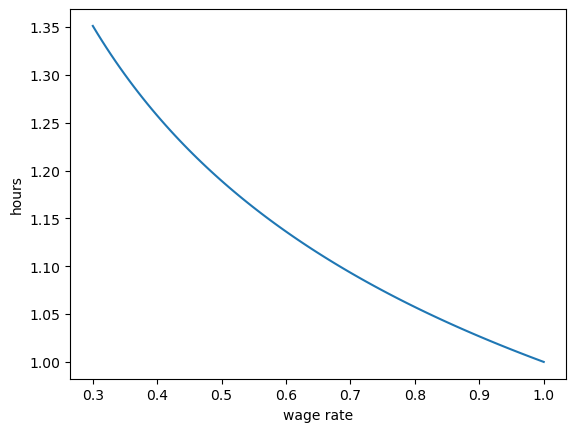

In [26]:
import matplotlib.pyplot as plt

plt.plot(w_grid, h_grid)
plt.xlabel('wage rate')
plt.ylabel('hours')

In [27]:
from workshop06_ex1 import solve_firm

L_demand = [solve_firm(w, par)[0] for w in w_grid]

Text(0, 0.5, 'labor demand')

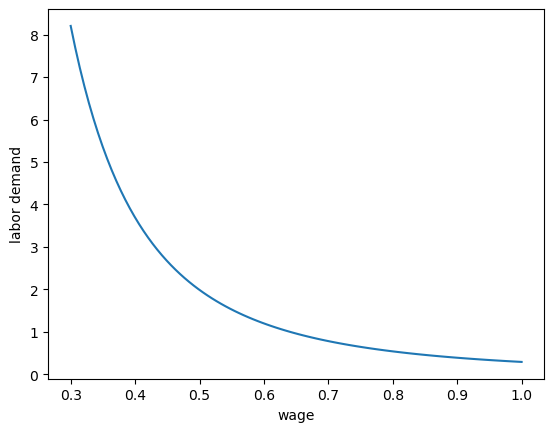

In [28]:
plt.plot(w_grid, L_demand)
plt.xlabel('wage')
plt.ylabel('labor demand')

In [29]:
from workshop06_ex1 import compute_labor_ex_demand

ex_demand = [compute_labor_ex_demand(w, par) for w in w_grid]

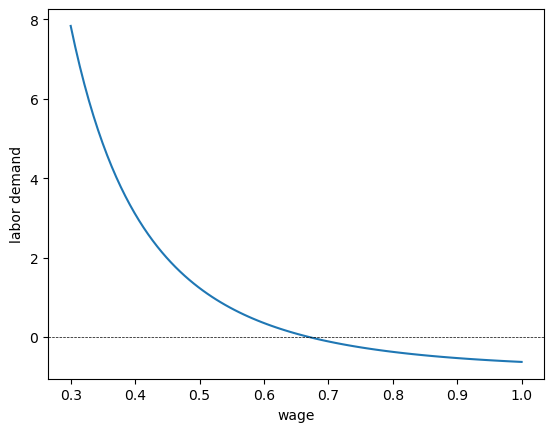

In [30]:
plt.plot(w_grid, ex_demand)
plt.xlabel('wage')
plt.ylabel('labor demand')
plt.axhline(0, c='black', ls='--', lw=0.5)

In [31]:
from workshop06_ex1 import compute_equilibrium

eq = compute_equilibrium(par)

In [34]:
from workshop06_ex1 import print_equilibrium

print_equilibrium(eq)

Equilibrium:
  Households:
    c = 0.92453
    h = 0.88461
  Firms:
    Y = 0.92453
    L = 0.88461
    Pi = 0.33283
  Prices:
    w = 0.66888
  Market clearing:
    Labor market: -2.03651e-09
    Goods market: 1.36219e-09


***
# Exercise 2: Unequal distribution of profits

We now extend the setting from Exercise 1 and assume that a fraction of households solely live on their labor income (type 1),
while profits are only distributed to a subset of households (type 2). We can think of these households as workers and entrepreneurs, respectively.
We assume the economy is populated by $N_1$ households of type 1 and $N_2$ households of type 2.

## Household problem

All households have identical preferences which are unchanged from the previous exercise, but their budget constraints differ. For type-1 households, it is given by 
$$
c_1 = w \cdot h_1
$$
whereas for type-2 households it's
$$
c_2 = w \cdot h_2 + \pi_2
$$
The subscripts in $c_1$, $c_2$, $h_1$, $h_2$, and $\pi_2$ index the household type since different households will
choose different levels of consumption and labor supply.

## Firm problem

The firm problem remains unchanged from the previous exercise. For convenience, we repeat the central equations:
$$
\begin{aligned}
\text{Labor demand: } && L &= \left(\frac{(1-\alpha) z}{w}\right)^{\frac{1}{\alpha}}  \\
\text{Output: } && Y &= z L^{1-\alpha}  \\
\text{Profits: } && \Pi &= zL^{1-\alpha} - wL 
\end{aligned}
$$


## Equilibrium

The general equilibrium in this economy is a set of quantities $(L,Y,\Pi,c_1,c_2,h_1,h_2,\pi_2)$ and the wage rate $w$ 
which solve the household's and firm's problem, and the following conditions are satisfied:

- Labor market clearing: $L = N_1 h_1 + N_2 h_2$ (hours supplied by households equal labor $L$ demanded by firms).
- Goods market clearing: $Y = N_1 c_1 + N_2 h_2$ (the amount of goods consumed by households equals aggregate output).
- Profits: $\Pi = N_2 \pi_2$ (profits distributed by firms equal profits received by type-2 households).

## Numerical solution

In the following, you are asked to adapt the code you wrote for exercise 1 to solve the modified problem.
The new solution only requires changes at a few selected points to take into account the unequal distribution of profits.
You should use the template file [`workshop06_ex2.py`](workshop06_ex2.py) provided for this exercise.

1.  Adapt the `Parameters` class to include the two new parameters `N1` and `N2` which represent the 
    number of type-1 and type-2 households, respectively.
    Set $N_1 = 5$ and $N_2 = 5$.

    For the remaining parameters, use the same values as in exercise 1.

2.  Write the function `compute_labor_ex_demand(w, par)` which returns the excess labor demand for given $w$.
    Use the function `solve_hh()` and `solve_firm()` you wrote for exercise 1 to solve this task.

    *Hint:* Don't copy the implementations for `solve_hh()` and `solve_firm()` but 
    directly import them from the module which contains the solution for exercise 1:

    ```python
    from workshop01_ex1 import solve_firm, solve_hh
    ```

3.  Write the function `compute_equilibrium(par)` which uses a root-finder 
    to locate the equilibrium, computes the equilibrium
    quantities $(L,Y,\Pi,c_1,h_1,c_2,h_2,\pi_2)$ and the wage rate $w$, and stores these
    using an instance of the `Equilibrium` data class defined in [`workshop06_ex2.py`](workshop06_ex2.py).

4.  Compute the equilibrium using the function you just implemented 
    and print the quantities and prices using 
    `print_equilibrium()` defined in [`workshop06_ex2.py`](workshop06_ex2.py).

    How does the unequal distribution of profits affect consumption and labor supply of 
    type-1 vs type-2 households?

5.  You are interested to see if and how the allocation and prices in the economy change as we vary the number of type-1 and type-2 households.
    Assume that there are a total of $N = N_1 + N_2 = 10$ households in the economy
    
    -   Using the function `compute_equilibrium()` you wrote earlier, compute the equilibrium when $N_1$ takes on the integer values from $0,\dots,9$
        and $N_2 = N - N_1$.

    -   Create a graph with four panels ($2 \times 2$) which shows the aggregates $Y$, $L$, $\Pi$, and $w$ as a function of $N_1$.

    -   Create a graph with three columns which shows $(c_1, c_2)$ in the first, $(h_1, h_2)$ in the second, and $\pi_2$ in the third column.
        Use different colors and line styles to distinguish household types and include a legend.

        What do you conclude about the effects of inequality on the equilibrium allocation and prices?

In [40]:
from workshop06_ex2 import Parameters, compute_labor_ex_demand

#Create a parameter instance
par = Parameters()

In [41]:
w_grid = np.linspace(0.1, 0.5, 50)
L_demand = [compute_labor_ex_demand(w, par) for w in w_grid]

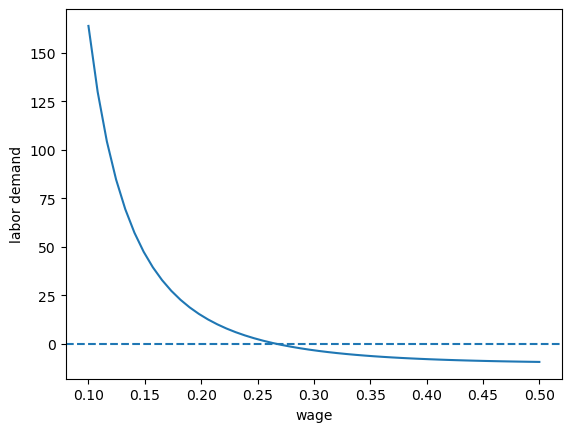

In [42]:
plt.plot(w_grid, L_demand)
plt.xlabel('wage')
plt.ylabel('labor demand')
plt.axhline(0, ls='--',)

## Bonus: using analytical results and root-finding

Unlike the previous exercise, this economy no longer has a closed-form solution for the equilibrium quantities. 
From the households' first-order conditions, we can derive that the equilibrium is characterized by the two non-linear equations
$$
\begin{aligned}
(w h_1)^{-\gamma} &= \psi \frac{h_1^{1/\theta}}{w} \\
(w h_1 + \pi_2)^{-\gamma} &= \psi \frac{h_2^{1/\theta}}{w}
\end{aligned}
$$
Note that $w$ and $\pi_2 = \frac{\Pi}{N_2}$ itself are functions of $(h_1, h_2)$ via the labor market clearing $L = N_1 h_1 + N_2 h_2$:
$$
\begin{aligned}
w &= (1-\alpha) z L^{-\alpha} = (1-\alpha) z \bigl(N_1 h_1 + N_2 h_2 \bigr)^{-\alpha} \\
\Pi &= \alpha z L^{1-\alpha} = \alpha z \bigl(N_1 h_1 + N_2 h_2 \bigr)^{1-\alpha} 
\end{aligned}
$$
We can substitute these two equations into the non-linear equation system above and numerically find a solution $(h_1, h_2)$ that satisfies these conditions.

1. Use the multivariate root-finder
    [`root()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.root.html)
    from `scipy.optimize`
    with `method='hybr'` to solve the above equation system. 
    
    To do this, you need to write a function
    which takes as argument a vector `x` which contains the values $(h_1, h_2)$, and return the 
    errors in the two first-order conditions, i.e., a vector that contains the left-hand 
    minus the right-hand side for each of the two equations.

2.  Make sure the results obtained from this approach are the same as in the main exercise.

*Note:* Include the following cell magic to automatically reload any changes you make to the template file:

In [43]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
